<a href="https://colab.research.google.com/github/POS-Cross/Bravo-EDA/blob/alaa/Bravo_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bravo Supermartk Exploratory Data Analysis notebook

---

## Business Opportunity:

---
This project aims to develop a cross-selling recommander system that helps Bravo employees to offer a special cross-selling for their customers. The recommender system should predict the customers’ interests and recommend for them related products to buy as a package using Cross-selling marketing technique. Such products generally belong to different product categories but will be complementary. For example,  **“Eggs 30 Pcs”** with  **“Abu Eta Noodles 200G”**, or **“Al - Junaidi Milk Milk Long Life 1L”**.

**Cross-selling product recommendation API** would help in:
* Increases customer retention.
* Increases average order value and lifetime value.
* Maintaining market share.
* Add a competitive advantage.
* Attract more customers. 


---


## Business Objectives
* **BO-1:**  Enhancing the competitive position, maintaining and increasing the market share.
* **BO-2:** Classify customers per selling quantities and work on 20/80 role.
* **BO-3:** This system will decrease 75% of expiry date quantities.
* **BO-4:** This system will increase the efficiency of cross-selling offers. 
* **BO-5:** Reducing lost applications with no more than 0.001%  following the initial release.
* **BO-6:** Increase Bravo’s market share.
* **BO-7:** Increase customer loyalty and satisfaction.

# **Table Of Contents**

---



>[Bravo Supermartk Exploratory Data Analysis notebook](#scrollTo=YQYmSCxzyUtz)

>>[Business Opportunity:](#scrollTo=YQYmSCxzyUtz)

>>[Business Objectives](#scrollTo=YQYmSCxzyUtz)

>[Table Of Contents](#scrollTo=d7nHlOdgdaOe)

>>[Loading the Dataset](#scrollTo=igPijalv0jxQ)

>>>[Mounting Google Drive locally](#scrollTo=5oKaekCDLYRV)

>>>[Load the required libraries](#scrollTo=A6Yk2l4e0B48)

>>>[Fields Description](#scrollTo=AcaPBsy_5Dd6)

>>[Data Transformation and Cleansing](#scrollTo=M7O9W4db0o4-)

>>>[Split the DateTime coulmn](#scrollTo=UXW4h1xbc4EZ)

>>[Explore Data (First Look)](#scrollTo=2Ni__z_y_CzP)

>>[Statistical Question:](#scrollTo=ousjVXQIK0av)

>>>[Q1: How many customer Groups are there?](#scrollTo=XXDrkQrZK7zD)

>>>[Q2: What is the percentage of each group?](#scrollTo=B-12Je43goMg)

>>>[Q3: What are the monthly purchases for customers?](#scrollTo=TwzxCMZti59H)

>>>[Q4: What are the items count with promotion/ items without promotion?](#scrollTo=Bc18w67aMDC5)

>>>[Q5: What are the Net Sales sum for items with promotion/ items without promotion in each bill?](#scrollTo=nWJIoganMwEg)

>>>[Q6: What are the items per offer? / What are the Number of times the item was purchsed?](#scrollTo=E5B4KfjQS649)

>>>[Q7: Is there any item that included in more than one offer?](#scrollTo=qkgEBR1UXMfi)

>>>[Q8: What are the top relatead items (bought togther)?](#scrollTo=dgPFGT7H9qkL)

>>>[Q9 :What are the related items bought by customers?](#scrollTo=qM40rLhNJY54)

>>>[Q10 :What is the relation between item discount percentage and number of payments?](#scrollTo=WbMTIFjMJhZL)

>>>[Q11: What are the frequent items for each customer in all orders?](#scrollTo=GagaOf16JpS-)



**Instructions**:  
All cells (blocks) below are code cells and should be edited with extreme care. Lines starting with # are comments (not executed).  
The next two cells should not be changed.  
**Important**: Click the folder icon to the left to show the session (temporary) files, then click the G drive icon (top right in the left pane) and select Connect to Google Drive. You should see a folder named drive.   
**Adjust parameters**: The easiest way is to edit the required parameters (4 items below) and run the whole script from the Runtime menu (run all).   
**Note**: It is good practice to turn off the session (Runtime -> Manage Sessions -> Terminate) after you copy the file. The system will timeout after somtime of inactivity. There is no need to change compute type.


## Loading the Dataset

### Mounting Google Drive locally

### 1. Load the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


# Visual setup
import matplotlib.ticker as ticker
plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
custom_colors = ['#74a09e','#f2a553', '#d96548', '#c14953','#86c1b2','#98e2c6','#f3c969']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

CSV = "http://ec2-3-128-207-73.us-east-2.compute.amazonaws.com:8002/uploads/uploads/2021/9/20/19e5badc-19f3-11ec-b8c6-09d958cd918a.csv"



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.


### **Fields Description**
---
The `Query.csv` file contains data for **3481792** transactions on Bravo supermarket. Each row represents one trasaction (item bought). The columns describe different attributes about the transaction such Item Name, Customer Number, Barcode, Bill No, etc. 

**Notes:**


*   **cBrutoValue** = **GrossRetailPrice** * **Quantity**
*   **DiscountValue** is linked with **bHasPromotions** with **OfferNo**, example if **DiscountValue** = 0 then, **bHasPromotions** = 0 and **OfferNo**=0. 
if **DiscountValue**=2 then, **bHasPromotions**= -1, and **OfferNo** <>0 


---

**Discrption of the list of available variables :**

* Columns
* dTicketInternalKey
* BravoNo
* Invoice_Date
* cBrutoValue
* POS_NO
* BillNo
* dItemInternalKey
* Barcode
* ItemName
* GrossRetailPrice
* Quantity
* TotalBeforeDisc
* DiscValue
* NetSales_IncVAT
* Total_Net_InvoiceIncVAT
* bHasPromotions
* OfferNo
* dVendorId
* DeptNo
* CashierNo
* CustomerGroup
* CustomerNo


In [2]:
df_items=pd.read_csv(CSV)
df_items

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.8,-1,13369,103260.0,104,804,0,0
1,30860300,1,01/09/2019 0:00:00,6.00,2,50200,21718,252164,Healthy Bread Pcs,6.0,1.00,6.00,0.00,6.00,18.8,0,0,104540.0,107,804,0,0
2,30860300,1,01/09/2019 0:00:00,2.00,2,50200,75254,7622210622211,Cadbury 5Star 48G,2.0,1.00,2.00,0.00,2.00,18.8,0,0,106470.0,112,804,0,0
3,30860300,1,01/09/2019 0:00:00,1.00,2,50200,77885,6221007027751,Nesquik Biscuit Milk 56G,1.0,1.00,1.00,0.00,1.00,18.8,0,0,101520.0,112,804,0,0
4,30860301,1,01/09/2019 0:00:00,25.00,2,50201,1292,7622100919261,Marlboro Red,25.0,1.00,25.00,0.00,25.00,45.0,0,0,501024.0,108,804,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.9,-1,15967,100405.0,112,847,1,628959
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.9,-1,16124,101730.0,112,847,1,628959
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.9,-1,14084,101590.0,108,847,1,628959
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.9,-1,15482,101590.0,108,847,1,628959


## Data Transformation and Cleansing





* **Check for null values**

In [ ]:
df_items.isnull().any()

dTicketInternalKey         False
BravoNo                    False
Invoice_Date               False
cBrutoValue                False
POS_NO                     False
BillNo                     False
dItemInternalKey           False
Barcode                    False
ItemName                   False
GrossRetailPrice            True
Quantity                   False
TotalBeforeDisc            False
DiscValue                  False
NetSales_IncVAT            False
Total_Net_InvoiceIncVAT    False
bHasPromotions             False
OfferNo                    False
dVendorId                  False
DeptNo                     False
CashierNo                  False
CustomerGroup              False
CustomerNo                 False
dtype: bool

Only The field named **GrossRetailPrice** has **Null** values, let us explore the records containing null values.

In [ ]:
df_items[df_items.GrossRetailPrice.isnull()]

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
1106395,31172985,2,08/10/2019 0:00:00,4.99,1,86055,28355,9700192832519,Rejected,NaN,1.0,4.99,0.0,4.99,16.0,0,0,0.0,0,736,0,0
1921583,31375957,1,05/11/2019 0:00:00,19.99,7,35540,33738,9700477711362,Rejected,NaN,1.0,19.99,0.0,19.99,81.0,0,0,0.0,0,839,0,0
1923338,31376207,1,05/11/2019 0:00:00,19.99,7,35674,33738,9700477711362,Rejected,NaN,1.0,19.99,0.0,19.99,289.5,0,0,0.0,0,839,1,401844


The GrossRetailPrice has **NAN** values where **ItemName = Rejected**, the item is returned and not included in the Bill, so we will drop it from the data frame becuase it is not valid. The total number of rows (transactions) after dropping the **NAN** values is **3,481,789**

In [10]:
df_clean= df_items.dropna()
df_clean.shape[0]

3481789

### Split the DateTime coulmn


---
In this step, we are going to split the DateTime column into three columns [day, month, year] and add them to the data frame in order to achieve atomic clean data.



In [56]:
def splitDay(value):
  return int(value.split()[0].split("/")[0])
def splitMonth(value):
  return int(value.split()[0].split("/")[1])
def splitYear(value):
  return int(value.split()[0].split("/")[2])   

df_clean =df_clean.convert_dtypes()
df_clean['day'] = df_clean.Invoice_Date.map(splitDay)
df_clean['month'] =df_clean.Invoice_Date.map(splitMonth)
df_clean['year'] = df_clean.Invoice_Date.map(splitYear)

df_clean

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.80,-1,13369,103260,104,804,0,0,1,9,2019
10,30860304,1,01/09/2019 0:00:00,11.00,2,50204,68248,6253501790497,Ghadeer Water 12*500M Case,11.0,1.00,11.00,1.00,10.00,12.00,-1,15193,102550,112,804,0,0,1,9,2019
21,30860310,1,01/09/2019 0:00:00,27.00,2,50210,63361,9555127903815,Royal Classic Butter Cookies 908G,27.0,1.00,27.00,2.00,25.00,35.25,-1,13014,102570,112,804,0,0,1,9,2019
31,30860315,1,01/09/2019 0:00:00,30.00,2,50215,56302,72989425,Ben &Jerry Brouns Chocolate 500G,30.0,1.00,30.00,8.00,22.00,99.50,-1,16169,100405,106,804,0,0,1,9,2019
32,30860315,1,01/09/2019 0:00:00,30.00,2,50215,56306,72986455,Ben &Jerry New Yourk Ice Cream 500G,30.0,1.00,30.00,8.00,22.00,99.50,-1,16169,100405,106,804,0,0,1,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.90,-1,15967,100405,112,847,1,628959,14,12,2019
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.90,-1,16124,101730,112,847,1,628959,14,12,2019
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.90,-1,14084,101590,108,847,1,628959,14,12,2019
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.90,-1,15482,101590,108,847,1,628959,14,12,2019


## Explore Data (First Look)
---

### Q1: What are the frequency and total net values for all trasactions?

In [19]:
num = df_items.dTicketInternalKey.count()
sum = df_items.NetSales_IncVAT.sum()
print('The count of transactions number for all vlaues = ', num)
print('The sum of transactions values for all vlaues = ', sum)

The count of transactions number for minus vlaues =  3481792
The sum of transactions values for minus vlaues =  40922634.68000003


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3481789 entries, 0 to 3481791
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   dTicketInternalKey       Int64  
 1   BravoNo                  Int64  
 2   Invoice_Date             string 
 3   cBrutoValue              float64
 4   POS_NO                   Int64  
 5   BillNo                   Int64  
 6   dItemInternalKey         Int64  
 7   Barcode                  Int64  
 8   ItemName                 string 
 9   GrossRetailPrice         float64
 10  Quantity                 float64
 11  TotalBeforeDisc          float64
 12  DiscValue                float64
 13  NetSales_IncVAT          float64
 14  Total_Net_InvoiceIncVAT  float64
 15  bHasPromotions           Int64  
 16  OfferNo                  Int64  
 17  dVendorId                Int64  
 18  DeptNo                   Int64  
 19  CashierNo                Int64  
 20  CustomerGroup            Int64  
 21  Customer

Now the dataframe **df_clean** contains clean and atomic data.
**`Summary`**: **dtypes: Int64(13), float64(7), int64(3), string(2), memory usage: 733.8 MB**. The total number of cloumns (features) is 
 **25**, and the number of records is **3,481,789**.



From the clean data frame, we will drop unimportant features. Those features are either a repeated data or not useful in the EDA at this stage.

**Descriptive analysis**

In [11]:
df_clean.describe()

,dTicketInternalKey,BravoNo,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
count,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06
mean,3.132324e+07,3.624966e+00,1.309281e+01,2.594319e+00,4.801253e+04,4.487879e+04,5.119277e+12,1.210402e+01,1.533528e+00,1.309281e+01,1.339488e+00,1.175332e+01,1.751565e+02,-3.101187e-01,4.187299e+03,1.516755e+05,1.074356e+02,5.127829e+02,2.935948e-01,1.258388e+05
std,2.567027e+05,2.748435e+00,1.785420e+01,1.532749e+00,3.086681e+04,2.735733e+04,3.112059e+12,1.474821e+01,2.929979e+00,1.785420e+01,3.694893e+00,1.591552e+01,2.116725e+02,4.625421e-01,6.428605e+03,1.305203e+05,4.943263e+00,3.158856e+02,4.554085e-01,2.085804e+05
min,3.086030e+07,1.000000e+00,-1.771000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.700000e+02,-1.771000e+03,-5.079000e+01,-1.771000e+03,-9.542000e+02,-1.000000e+00,0.000000e+00,9.990000e+02,1.000000e+02,1.100000e+01,0.000000e+00,0.000000e+00
25%,3.111291e+07,1.000000e+00,4.000000e+00,1.000000e+00,2.111400e+04,1.437500e+04,3.574660e+12,3.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,4.000000e+00,3.595000e+01,-1.000000e+00,0.000000e+00,1.016400e+05,1.030000e+02,1.680000e+02,0.000000e+00,0.000000e+00
50%,3.133082e+07,3.000000e+00,9.180000e+00,2.000000e+00,4.211000e+04,5.741600e+04,6.253503e+12,7.000000e+00,1.000000e+00,9.180000e+00,0.000000e+00,8.720000e+00,1.010000e+02,0.000000e+00,0.000000e+00,1.027300e+05,1.080000e+02,6.510000e+02,0.000000e+00,0.000000e+00
75%,3.154733e+07,5.000000e+00,1.600000e+01,3.000000e+00,7.951300e+04,6.876300e+04,7.290011e+12,1.500000e+01,1.480000e+00,1.600000e+01,1.330000e+00,1.400000e+01,2.395000e+02,0.000000e+00,1.075100e+04,1.046600e+05,1.120000e+02,8.140000e+02,1.000000e+00,3.133950e+05
max,3.175581e+07,1.000000e+01,2.500000e+03,7.000000e+00,9.999900e+04,7.832400e+04,1.000000e+13,2.500000e+02,6.000000e+02,2.500000e+03,6.120000e+02,2.200000e+03,3.183750e+03,0.000000e+00,1.634600e+04,5.010600e+05,3.330000e+02,8.500000e+02,1.000000e+00,4.353006e+06


We notice that the minimum value is less than zero for **TotalBeforeDisc,	DiscValue,	Total_Net_InvoiceIncVAT** so, we fetch data from the original data frame (clean) for records with **Quantity < 0**, and we found that there are **6989 rows** that have values less than zero. This leads us to the Question, ***What does Quantity less than zero mean?***

### Q2: What are the frequency and net sum of returned trasactions? 

In [26]:
indexNames = df_clean.loc[(df_clean['Total_Net_InvoiceIncVAT']<0) | (df_clean['TotalBeforeDisc']< 0) | (df_clean['DiscValue'] < 0) | (df_clean['NetSales_IncVAT']<0)].index
df_minus= df_clean.loc[indexNames]
df_minus.describe()
num = df_minus.dTicketInternalKey.count()
sum = df_minus.NetSales_IncVAT.sum()
print('The count of transactions number for minus vlaues = ', num)
print('The sum of transactions values for minus vlaues = ', sum)

The count of transactions number for minus vlaues =  82
The sum of transactions values for minus vlaues =  -209.8


In [12]:
df_clean[ df_clean.Quantity < 0]

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
109,30860336,1,01/09/2019 0:00:00,-15.00,2,50236,1164,24000104582,Delmonte Sweet Corn 410G,5.0,-3.0,-15.00,0.0,-15.00,-5.00,0,0,106470.0,105,804,0,0
587,30860520,1,01/09/2019 0:00:00,-24.00,2,50302,62607,199474,Roastery 24 Nis,24.0,-1.0,-24.00,0.0,-24.00,-24.00,0,0,100460.0,100,804,0,0
2352,30861003,1,01/09/2019 0:00:00,-2.50,3,76125,22247,7290004125455,Shemenit 200G,2.5,-1.0,-2.50,0.0,-2.50,1.50,0,0,103260.0,103,814,0,0
2356,30861004,1,01/09/2019 0:00:00,-74.00,3,76306,45733,8906076274043,Al Walimeh Arabi Rice 10K,74.0,-1.0,-74.00,0.0,-74.00,-38.00,0,0,102730.0,105,814,0,0
2357,30861004,1,01/09/2019 0:00:00,-32.00,3,76306,77593,6281003103057,Mazola Sunflower Oil 3.5L,32.0,-1.0,-32.00,0.0,-32.00,-38.00,0,0,102550.0,105,814,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476702,31754991,1,14/12/2019 0:00:00,-12.00,3,24466,74427,6253802331115,Dates Diafy 0.5K,12.0,-1.0,-12.00,0.0,-12.00,-6.00,0,0,106670.0,111,839,0,0
3476778,31755014,1,14/12/2019 0:00:00,-2.00,3,24354,61929,6251036019625,Mr Chips Crocodilechips 30G,1.0,-2.0,-2.00,0.0,-2.00,-2.00,0,0,101580.0,112,839,0,0
3479433,31755648,1,14/12/2019 0:00:00,-18.00,7,45563,58947,8006746001211,Cotton Sticks In Rectangular Box 400,9.0,-1.0,-18.00,0.0,-18.00,-18.00,0,0,102120.0,109,835,0,0
3479593,31755661,1,14/12/2019 0:00:00,-22.00,2,1266,77747,7290113319417,Water Bottel Sport 650 Ml Mix,22.0,-1.0,-22.00,0.0,-22.00,39.15,0,0,103290.0,108,814,1,433005


**Data Cleaning for minus values** In this stage, we will drop data with values less than zero from the aforementioned fields that contain minus values.

In [28]:
# # Get names of indexes for which column Total_Net_InvoiceIncVAT has value less than 0
indexNames = df_clean.loc[(df_clean['Total_Net_InvoiceIncVAT']<=0) | (df_clean['TotalBeforeDisc']<= 0) | (df_clean['DiscValue'] <= 0) | (df_clean['Quantity']<= 0)].index

# Delete these row indexes from dataFrame
df_clean.drop(indexNames , inplace=True )
df_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.80,-1,13369,103260.0,104,804,0,0
10,30860304,1,01/09/2019 0:00:00,11.00,2,50204,68248,6253501790497,Ghadeer Water 12*500M Case,11.0,1.00,11.00,1.00,10.00,12.00,-1,15193,102550.0,112,804,0,0
21,30860310,1,01/09/2019 0:00:00,27.00,2,50210,63361,9555127903815,Royal Classic Butter Cookies 908G,27.0,1.00,27.00,2.00,25.00,35.25,-1,13014,102570.0,112,804,0,0
31,30860315,1,01/09/2019 0:00:00,30.00,2,50215,56302,72989425,Ben &Jerry Brouns Chocolate 500G,30.0,1.00,30.00,8.00,22.00,99.50,-1,16169,100405.0,106,804,0,0
32,30860315,1,01/09/2019 0:00:00,30.00,2,50215,56306,72986455,Ben &Jerry New Yourk Ice Cream 500G,30.0,1.00,30.00,8.00,22.00,99.50,-1,16169,100405.0,106,804,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.90,-1,15967,100405.0,112,847,1,628959
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.90,-1,16124,101730.0,112,847,1,628959
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.90,-1,14084,101590.0,108,847,1,628959
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.90,-1,15482,101590.0,108,847,1,628959


In [27]:
df_clean.describe()

,dTicketInternalKey,BravoNo,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
count,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06,3.472258e+06
mean,3.132326e+07,3.624307e+00,1.315300e+01,2.595161e+00,4.800954e+04,4.488105e+04,5.118588e+12,1.209759e+01,1.540337e+00,1.315300e+01,1.341924e+00,1.181108e+01,1.756878e+02,-3.106417e-01,4.194584e+03,1.516435e+05,1.074266e+02,5.129221e+02,2.942463e-01,1.260886e+05
std,2.567047e+05,2.749122e+00,1.764733e+01,1.533296e+00,3.086524e+04,2.735495e+04,3.112190e+12,1.473681e+01,2.896548e+00,1.764733e+01,3.674220e+00,1.572679e+01,2.116681e+02,4.627564e-01,6.431909e+03,1.304757e+05,4.768551e+00,3.158948e+02,4.557033e-01,2.086408e+05
min,3.086030e+07,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+01,5.000000e-02,-1.000000e+00,0.000000e+00,9.990000e+02,1.000000e+02,1.100000e+01,0.000000e+00,0.000000e+00
25%,3.111294e+07,1.000000e+00,4.000000e+00,1.000000e+00,2.111400e+04,1.437500e+04,3.574660e+12,3.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,4.000000e+00,3.600000e+01,-1.000000e+00,0.000000e+00,1.016400e+05,1.030000e+02,1.680000e+02,0.000000e+00,0.000000e+00
50%,3.133084e+07,3.000000e+00,9.360000e+00,2.000000e+00,4.210300e+04,5.745800e+04,6.253503e+12,7.000000e+00,1.000000e+00,9.360000e+00,0.000000e+00,8.820000e+00,1.013000e+02,0.000000e+00,0.000000e+00,1.027300e+05,1.080000e+02,6.510000e+02,0.000000e+00,0.000000e+00
75%,3.154734e+07,5.000000e+00,1.600000e+01,3.000000e+00,7.951000e+04,6.876300e+04,7.290011e+12,1.500000e+01,1.510000e+00,1.600000e+01,1.330000e+00,1.400000e+01,2.400000e+02,0.000000e+00,1.075100e+04,1.046600e+05,1.120000e+02,8.140000e+02,1.000000e+00,3.139790e+05
max,3.175581e+07,1.000000e+01,2.500000e+03,7.000000e+00,9.999900e+04,7.832400e+04,9.997870e+12,2.500000e+02,6.000000e+02,2.500000e+03,6.120000e+02,2.200000e+03,3.183750e+03,0.000000e+00,1.634600e+04,5.010600e+05,3.330000e+02,8.500000e+02,1.000000e+00,4.353006e+06


Data range for **Total_Net_InvoiceIncVAT** column.

In [22]:
print(df_clean.Total_Net_InvoiceIncVAT.min(),' - ' ,df_clean.Total_Net_InvoiceIncVAT.max())

0.0  -  3183.75


There are **1893 rows** with **Total_Net_InvoiceIncVAT = 0**, **What are these vlaues?**

In [ ]:
df_clean[df_clean.Total_Net_InvoiceIncVAT == 0]

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
11823,30862500,7,01/09/2019 0:00:00,2.0,1,56107,3964,5000312003602,Cadbury Flake 18G,1.0,2.0,2.0,0.0,2.0,0.0,0,0,106470,112,93,0,0,1,9,2019
11824,30862500,7,01/09/2019 0:00:00,0.5,1,56107,11119,7622210292896,Cadbury Dairy Milk 11 G,0.5,1.0,0.5,0.0,0.5,0.0,0,0,106470,112,93,0,0,1,9,2019
11825,30862500,7,01/09/2019 0:00:00,7.5,1,56107,12793,7290000042503,Milk Ameed 1L,7.5,1.0,7.5,1.0,6.5,0.0,-1,13901,103260,103,93,0,0,1,9,2019
11826,30862500,7,01/09/2019 0:00:00,-9.0,1,56107,64870,8691707190471,Ozmo Cereal Choc Corn Balls 325G,9.0,-1.0,-9.0,0.0,-9.0,0.0,0,0,100235,112,93,0,0,1,9,2019
17199,30863373,2,01/09/2019 0:00:00,1.0,3,43613,3121,6221134000108,Galaxy Flutes Chocolate 22.5G,1.0,1.0,1.0,0.0,1.0,0.0,0,0,102230,112,644,0,0,1,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466362,31748049,3,31/12/2019 0:00:00,-8.0,3,42756,77987,5053990106868,Pringles Paprika 165G,8.0,-1.0,-8.0,0.0,-8.0,0.0,0,0,501020,112,649,0,0,31,12,2019
3471504,31749023,5,31/12/2019 0:00:00,22.0,3,63159,344,1231932,Winston Light,22.0,1.0,22.0,0.0,22.0,0.0,0,0,100890,108,156,0,0,31,12,2019
3471505,31749023,5,31/12/2019 0:00:00,-22.0,3,63159,75155,7622100919230,Heets Amber,25.0,-1.0,-22.0,0.0,-22.0,0.0,0,0,501024,108,156,0,0,31,12,2019
3475404,31754667,1,14/12/2019 0:00:00,12.0,2,1227,9288,717273501874,American Garden Soy Sauce 296Ml,12.0,1.0,12.0,0.0,12.0,0.0,0,0,105140,105,814,0,0,14,12,2019


**Data Cleaning for Total_Net_InvoiceIncVAT values that equals zero**
In this stage we will drop data with value zero. 

In [23]:
# # Get names of indexes for which column Total_Net_InvoiceIncVAT has value equals 0
indexNames = df_clean.loc[(df_clean['Total_Net_InvoiceIncVAT']==0)].index

# # Delete these row indexes from dataFrame
df_clean.drop(indexNames , inplace=True )
df_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.8,-1,13369,103260.0,104,804,0,0
1,30860300,1,01/09/2019 0:00:00,6.00,2,50200,21718,252164,Healthy Bread Pcs,6.0,1.00,6.00,0.00,6.00,18.8,0,0,104540.0,107,804,0,0
2,30860300,1,01/09/2019 0:00:00,2.00,2,50200,75254,7622210622211,Cadbury 5Star 48G,2.0,1.00,2.00,0.00,2.00,18.8,0,0,106470.0,112,804,0,0
3,30860300,1,01/09/2019 0:00:00,1.00,2,50200,77885,6221007027751,Nesquik Biscuit Milk 56G,1.0,1.00,1.00,0.00,1.00,18.8,0,0,101520.0,112,804,0,0
4,30860301,1,01/09/2019 0:00:00,25.00,2,50201,1292,7622100919261,Marlboro Red,25.0,1.00,25.00,0.00,25.00,45.0,0,0,501024.0,108,804,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.9,-1,15967,100405.0,112,847,1,628959
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.9,-1,16124,101730.0,112,847,1,628959
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.9,-1,14084,101590.0,108,847,1,628959
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.9,-1,15482,101590.0,108,847,1,628959


In [24]:
print(df_clean.Total_Net_InvoiceIncVAT.min(),' - ' ,df_clean.Total_Net_InvoiceIncVAT.max())

0.05  -  3183.75


In [25]:
df_clean[df_clean.Total_Net_InvoiceIncVAT <.5]

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
2300,30860992,1,01/09/2019 0:00:00,0.10,3,76365,70483,729001107586,Mother Day,0.10,1.00,0.10,0.0,0.10,0.10,0,0,501020.0,110,814,0,0
16330,30863033,2,01/09/2019 0:00:00,0.05,3,43247,48291,81001,Bravo Plastic Bags,0.01,5.00,0.05,0.0,0.05,0.05,0,0,999.0,333,644,0,0
75683,30876091,2,03/09/2019 0:00:00,36.10,3,44209,1748,31003,Roast Beef,55.00,0.65,36.10,0.0,36.10,0.10,0,0,102500.0,102,644,0,0
75686,30876091,2,03/09/2019 0:00:00,16.00,3,44209,74079,8697666002596,Carton Cups 7Oz,4.00,4.00,16.00,6.0,10.00,0.10,-1,14310,104550.0,108,644,0,0
75888,30876149,2,03/09/2019 0:00:00,5.05,3,44272,62456,199580,Roastery 36 Nis,36.00,0.14,5.05,0.0,5.05,0.05,0,0,100460.0,100,644,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445986,31743951,1,31/12/2019 0:00:00,0.10,2,8974,70483,729001107586,Mother Day,0.10,1.00,0.10,0.0,0.10,0.10,0,0,501020.0,110,849,0,0
3447239,31744280,1,31/12/2019 0:00:00,0.01,3,32045,50026,9700376101059,Spoons Box,0.01,1.00,0.01,0.0,0.01,0.05,0,0,999.0,333,804,0,0
3447240,31744280,1,31/12/2019 0:00:00,0.03,3,32045,50028,9700376101073,Kitchen Toliet Roll 1200M,0.01,3.00,0.03,0.0,0.03,0.05,0,0,999.0,333,804,0,0
3447241,31744280,1,31/12/2019 0:00:00,0.01,3,32045,50039,9700376101189,Shrink-Blue,0.01,1.00,0.01,0.0,0.01,0.05,0,0,999.0,333,804,0,0


**The problem reamins with bills that have values near zero ?!!!**

Check The histogram for Discount

In [ ]:
print(df_transactions.DiscValue.min(),' - ' ,df_transactions.DiscValue.max())

-50.79  -  612.0


## Statistical Question:

---






### Q1: How many customer Groups are there? 




In [38]:
customers_reg_num = len(df_clean[df_clean.CustomerGroup == 1].CustomerNo.unique())
customers_unreg_num = len(df_clean[df_clean.CustomerGroup == 0].CustomerNo.unique())
print(customers_reg_num,' - ',customers_unreg_num)

14883  -  1


### Q4: What are the number of trasactions per regested customer in the whole period? 

Text(0, 0.5, 'Regestired Customer Number')

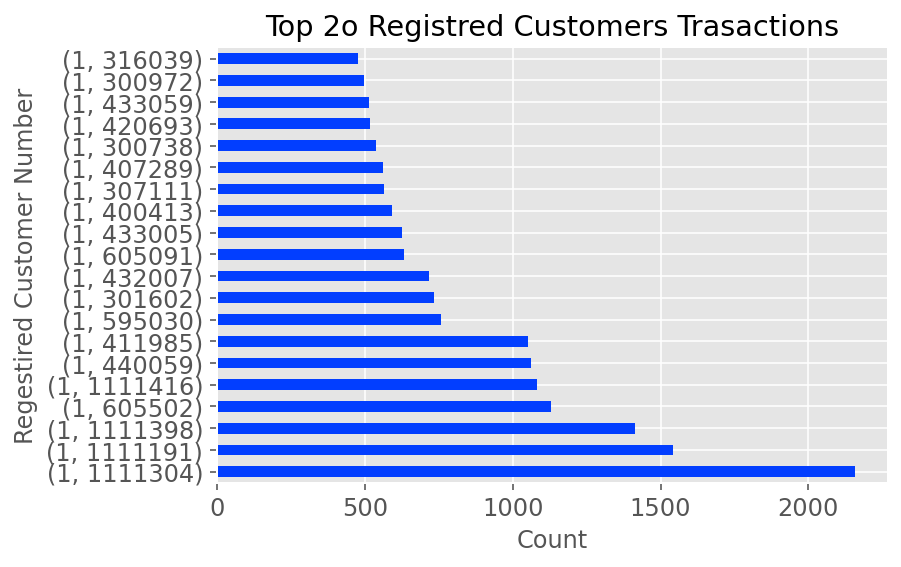

In [46]:
sns.set_palette('bright')

df_group =df_clean[df_clean.CustomerGroup==1].groupby(['CustomerGroup','CustomerNo'])
ax =df_group['BillNo'].count().sort_values(ascending=False).nlargest(20).plot.barh(title='Top 2o Registred Customers Trasactions')
ax.set_xlabel('Count')
ax.set_ylabel('Regestired Customer Number')

###Q4: What are the percentage of trasactions per Customer Group

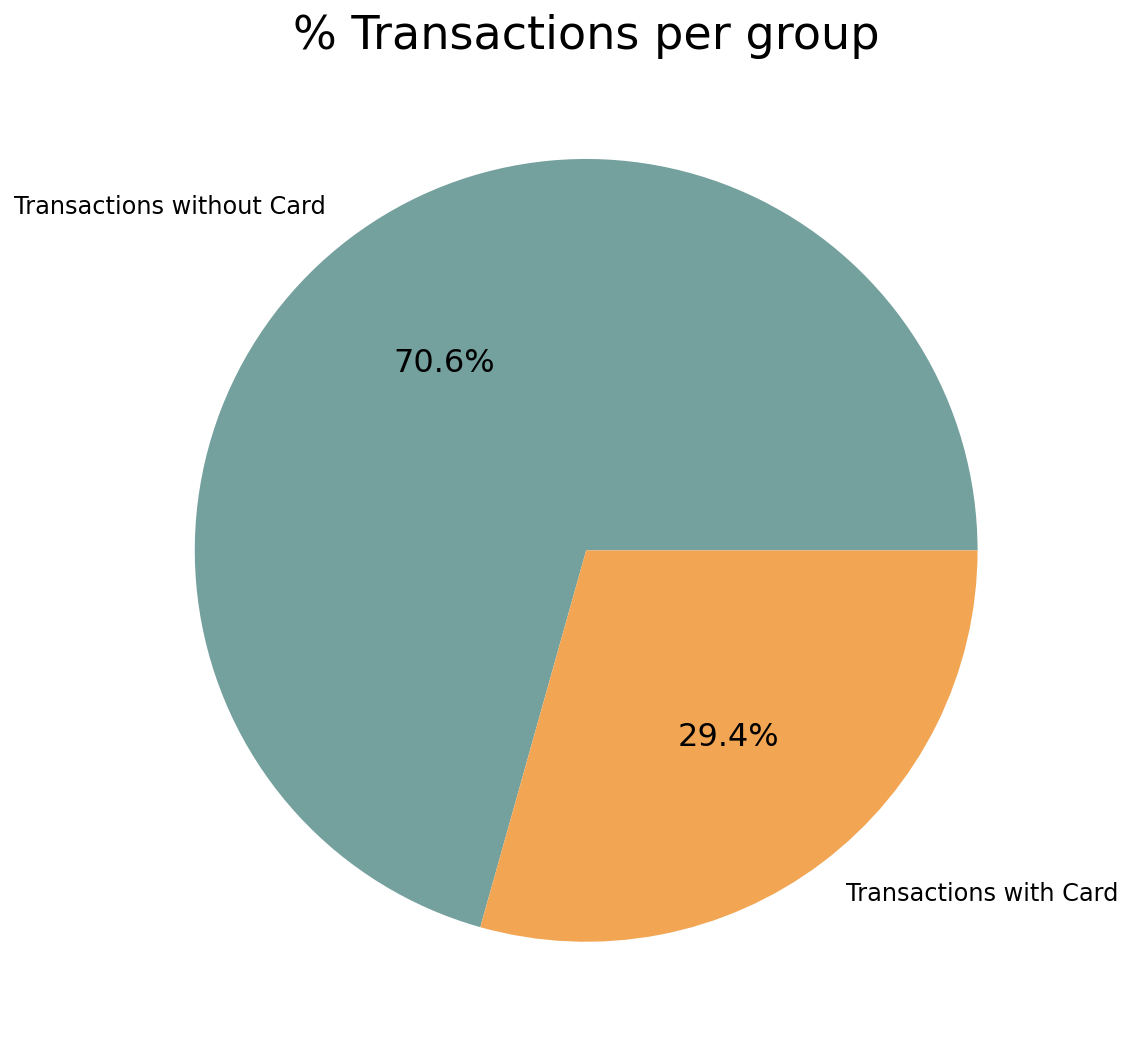

In [ ]:
ax = df_clean.CustomerGroup.value_counts().plot.pie(labels=['Transactions without Card','Transactions with Card'],autopct='%.1f%%')
ax.set_title('% Transactions per group')
ax.set_ylabel('');

The above figure shows clearly that the customer group 0 is dominentet with about 2.5 M customer, while the customer group 1 is about 1 M. The majority of the customers in the dataset are not rejesterd, i.e they don't have an ID, and hence, there is no history for their payments. 

### Q6: What are the percentage of Invoices per Customer Group?

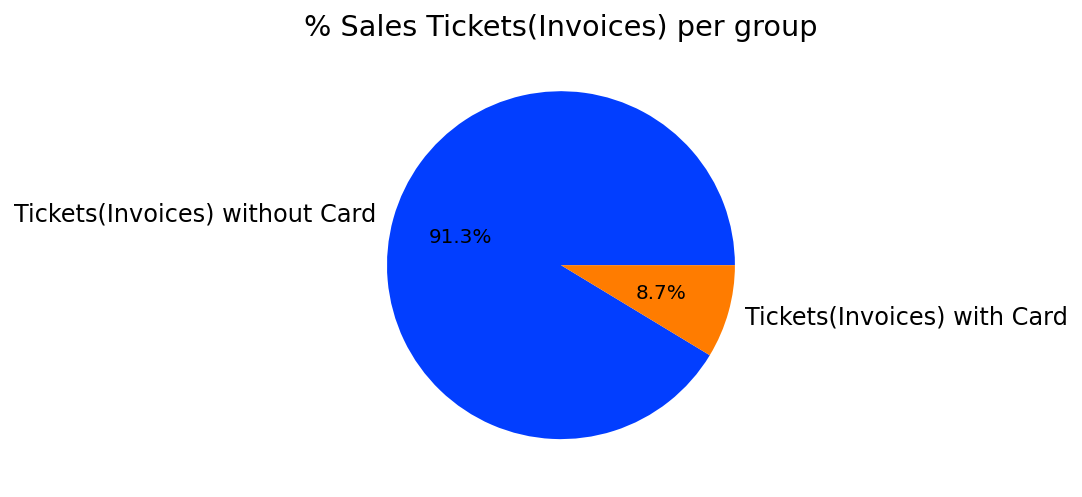

In [47]:
uniqueTickets =df_transactions.drop_duplicates("dTicketInternalKey")
ax =uniqueTickets.CustomerGroup.value_counts().plot.pie(labels=['Tickets(Invoices) without Card','Tickets(Invoices) with Card'],autopct='%.1f%%')
ax.set_title('% Sales Tickets(Invoices) per group')
ax.set_ylabel('');

Tickets don't have Bravo Thank you card **(CustomerGroup=zero)** have a percentage with ***91.3%*** while the Tickets have Bravo Card **(CustomerGroup=one)** are only about ***8.7%***.



### **Q3: What are the monthly purchases for customers?**


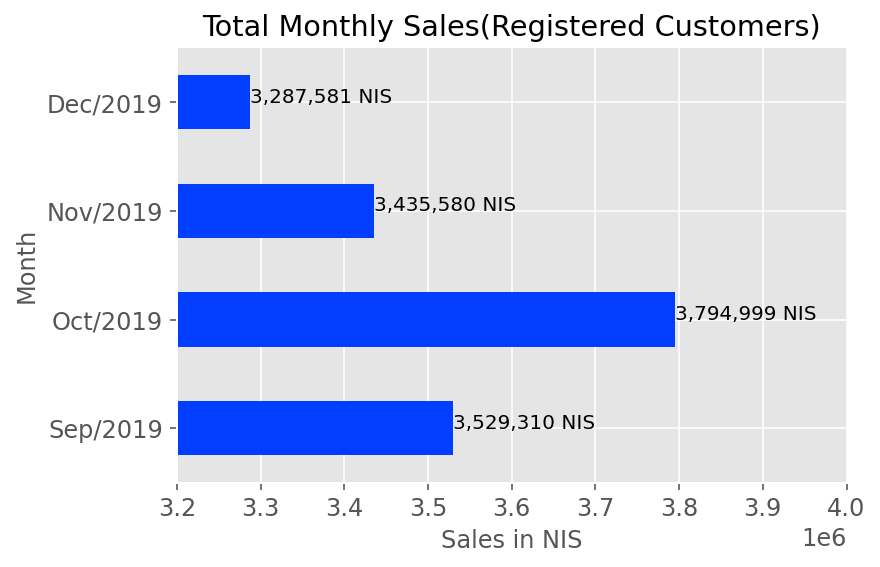

In [66]:
df_customers= df_clean[df_clean.CustomerGroup ==1] # only customers who have Bravo Card.
# f, ax = plt.subplots(1,1, figsize=(7, 4));

df_monthly_purchases=uniqueTickets[uniqueTickets.CustomerGroup ==1].groupby(['month'])
df_monthly_purchasesSum = df_monthly_purchases['Total_Net_InvoiceIncVAT'].sum()
ax = df_monthly_purchasesSum.plot.barh()
ax.set_yticklabels(['Sep/2019','Oct/2019','Nov/2019','Dec/2019'], minor=False)
ax.set_ylabel('Month');
ax.set_xlabel('Sales in NIS');
ax.set_title('Total Monthly Sales(Registered Customers)')
ax.set_xlim(3200000,4000000)

for index,data in enumerate(df_monthly_purchasesSum):
    ax.text(y=index , x =data , s="{:0,.0f} NIS".format(round(data)))

From the Figure, we can see that the highest monthly purchases are in October **3,794,999**, but in general, the differences are subtle.

### Q: What is the frequency of transactions according per month?
 

In [61]:
df_cust= df_clean[df_clean.CustomerGroup ==1] # only customers who have Bravo Card.

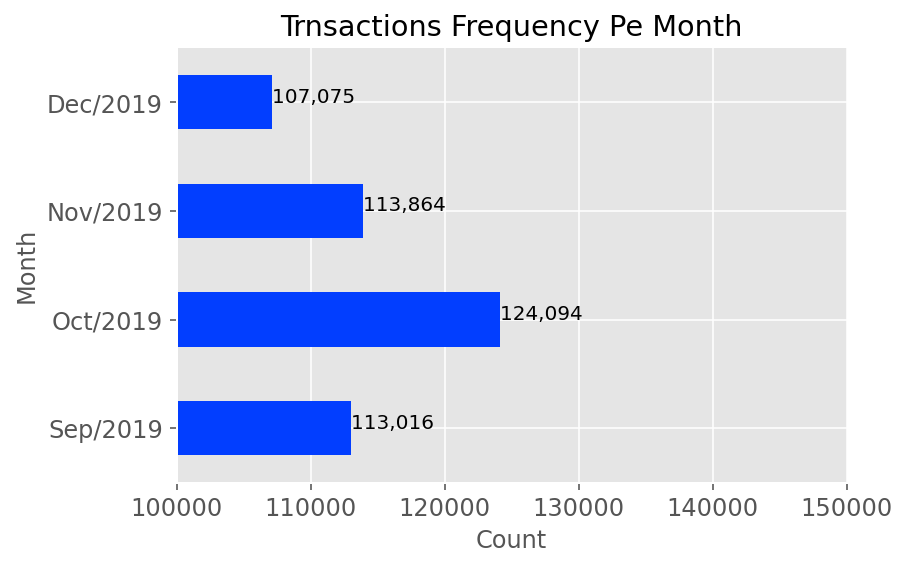

In [71]:

# f, ax = plt.subplots(1,1, figsize=(7, 4));

df_monthly_transactions=df_cust.groupby('month')
df_monthly_transactions_count = df_monthly_transactions.dTicketInternalKey.count()
ax = df_monthly_transactions_count.plot.barh()
ax.set_yticklabels(['Sep/2019','Oct/2019','Nov/2019','Dec/2019'], minor=False)
ax.set_ylabel('Month');
ax.set_xlabel('Count');
ax.set_title('Trnsactions Frequency Pe Month')
ax.set_xlim(100000,150000)

for index,data in enumerate(df_monthly_transactions_count):
    ax.text(y=index , x =data , s="{:0,.0f} ".format(data))

### Q: What are the frequency of transactions by day?

---



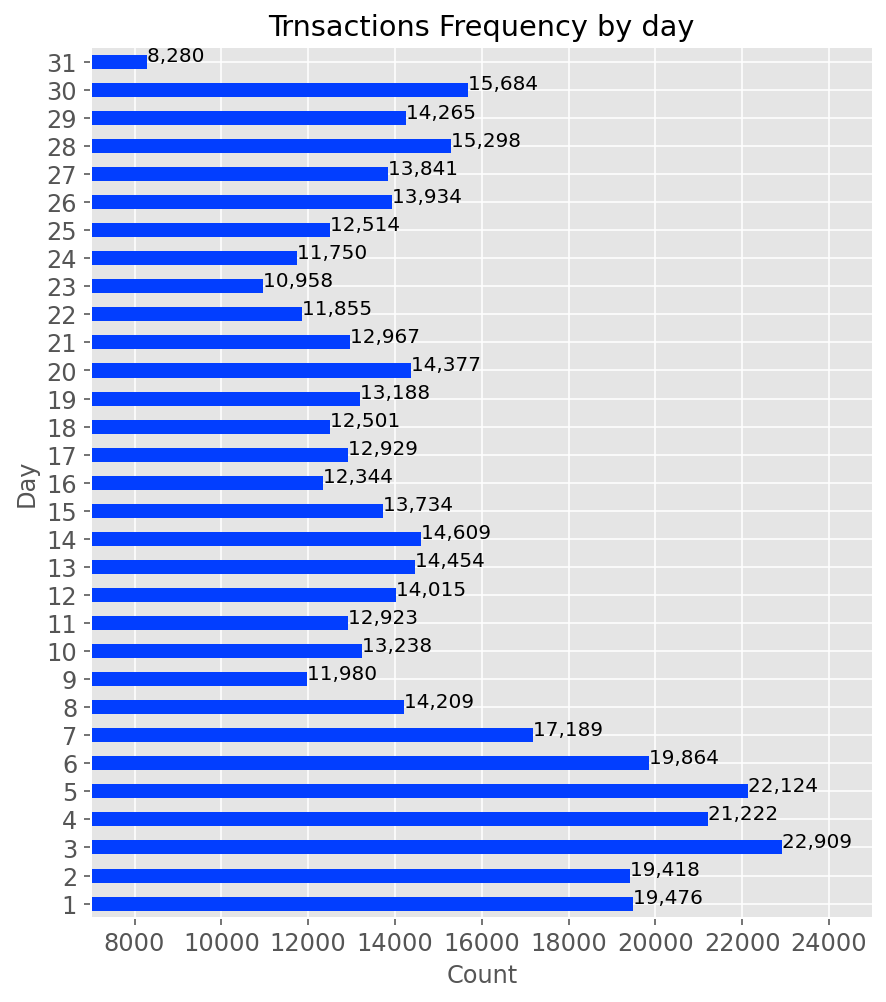

In [78]:
f, ax = plt.subplots(1,1, figsize=(7, 8));

df_monthly_transactions=df_cust.groupby('day')
df_monthly_transactions_count = df_monthly_transactions.dTicketInternalKey.count()
ax = df_monthly_transactions_count.plot.barh()
#ax.set_yticklabels(['Sep/2019','Oct/2019','Nov/2019','Dec/2019'], minor=False)
ax.set_ylabel('Day');
ax.set_xlabel('Count');
ax.set_title('Trnsactions Frequency by day')
ax.set_xlim(7000,25000)

for index,data in enumerate(df_monthly_transactions_count):
    ax.text(y=index , x =data , s="{:0,.0f} ".format(data))

###Q: What are the sales by day?

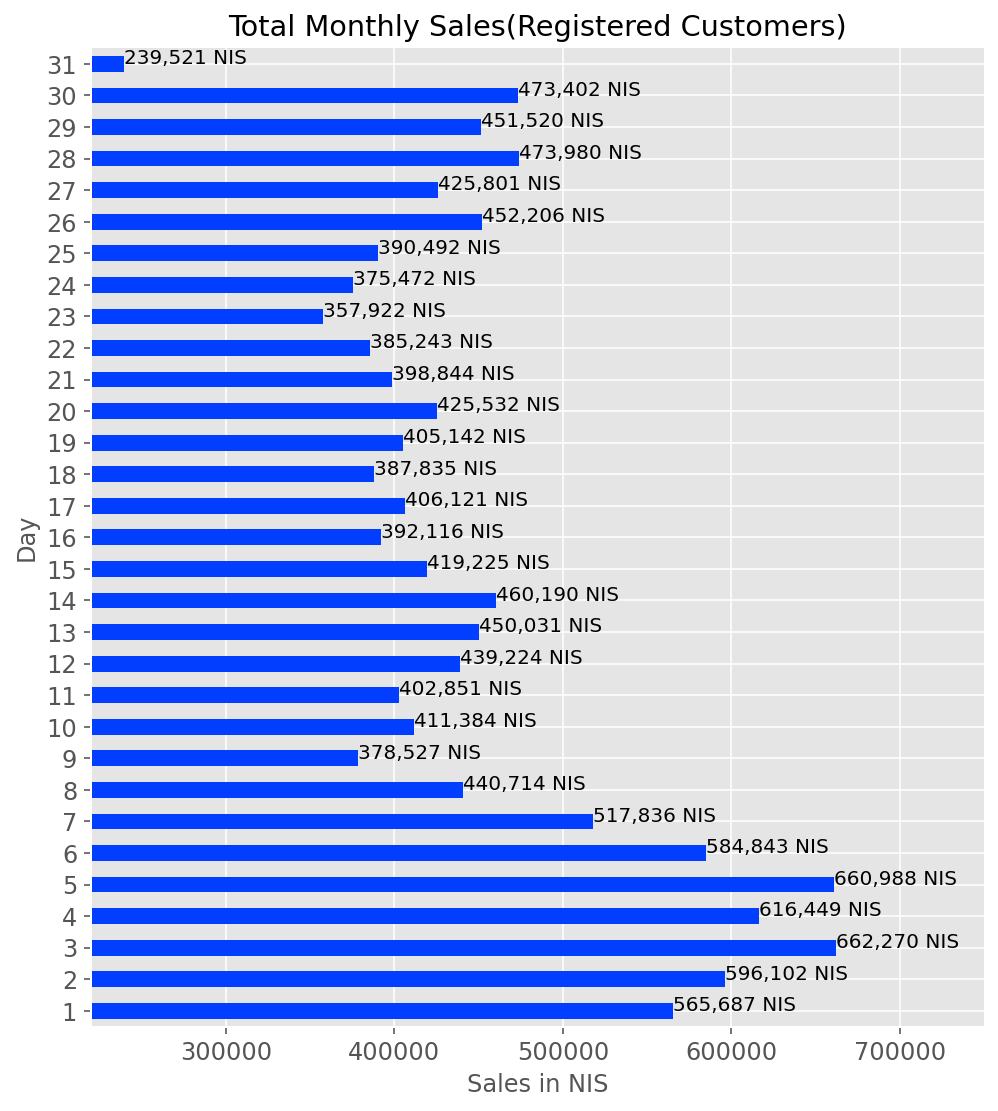

In [86]:
df_customers= df_clean[df_clean.CustomerGroup ==1] # only customers who have Bravo Card.
f, ax = plt.subplots(1,1, figsize=(8, 9));

df_monthly_purchases=uniqueTickets[uniqueTickets.CustomerGroup ==1].groupby(['day'])
df_monthly_purchasesSum = df_monthly_purchases['Total_Net_InvoiceIncVAT'].sum()
ax = df_monthly_purchasesSum.plot.barh()
#ax.set_yticklabels(['Sep/2019','Oct/2019','Nov/2019','Dec/2019'], minor=False)
ax.set_ylabel('Day');
ax.set_xlabel('Sales in NIS');
ax.set_title('Total Monthly Sales(Registered Customers)')
ax.set_xlim(220000,750000)

for index,data in enumerate(df_monthly_purchasesSum):
    ax.text(y=index , x =data , s="{:0,.0f} NIS".format(round(data)))

###Q: What are the top 20 best-selling products?

Text(0.5, 1.0, 'Most Ordered Products')

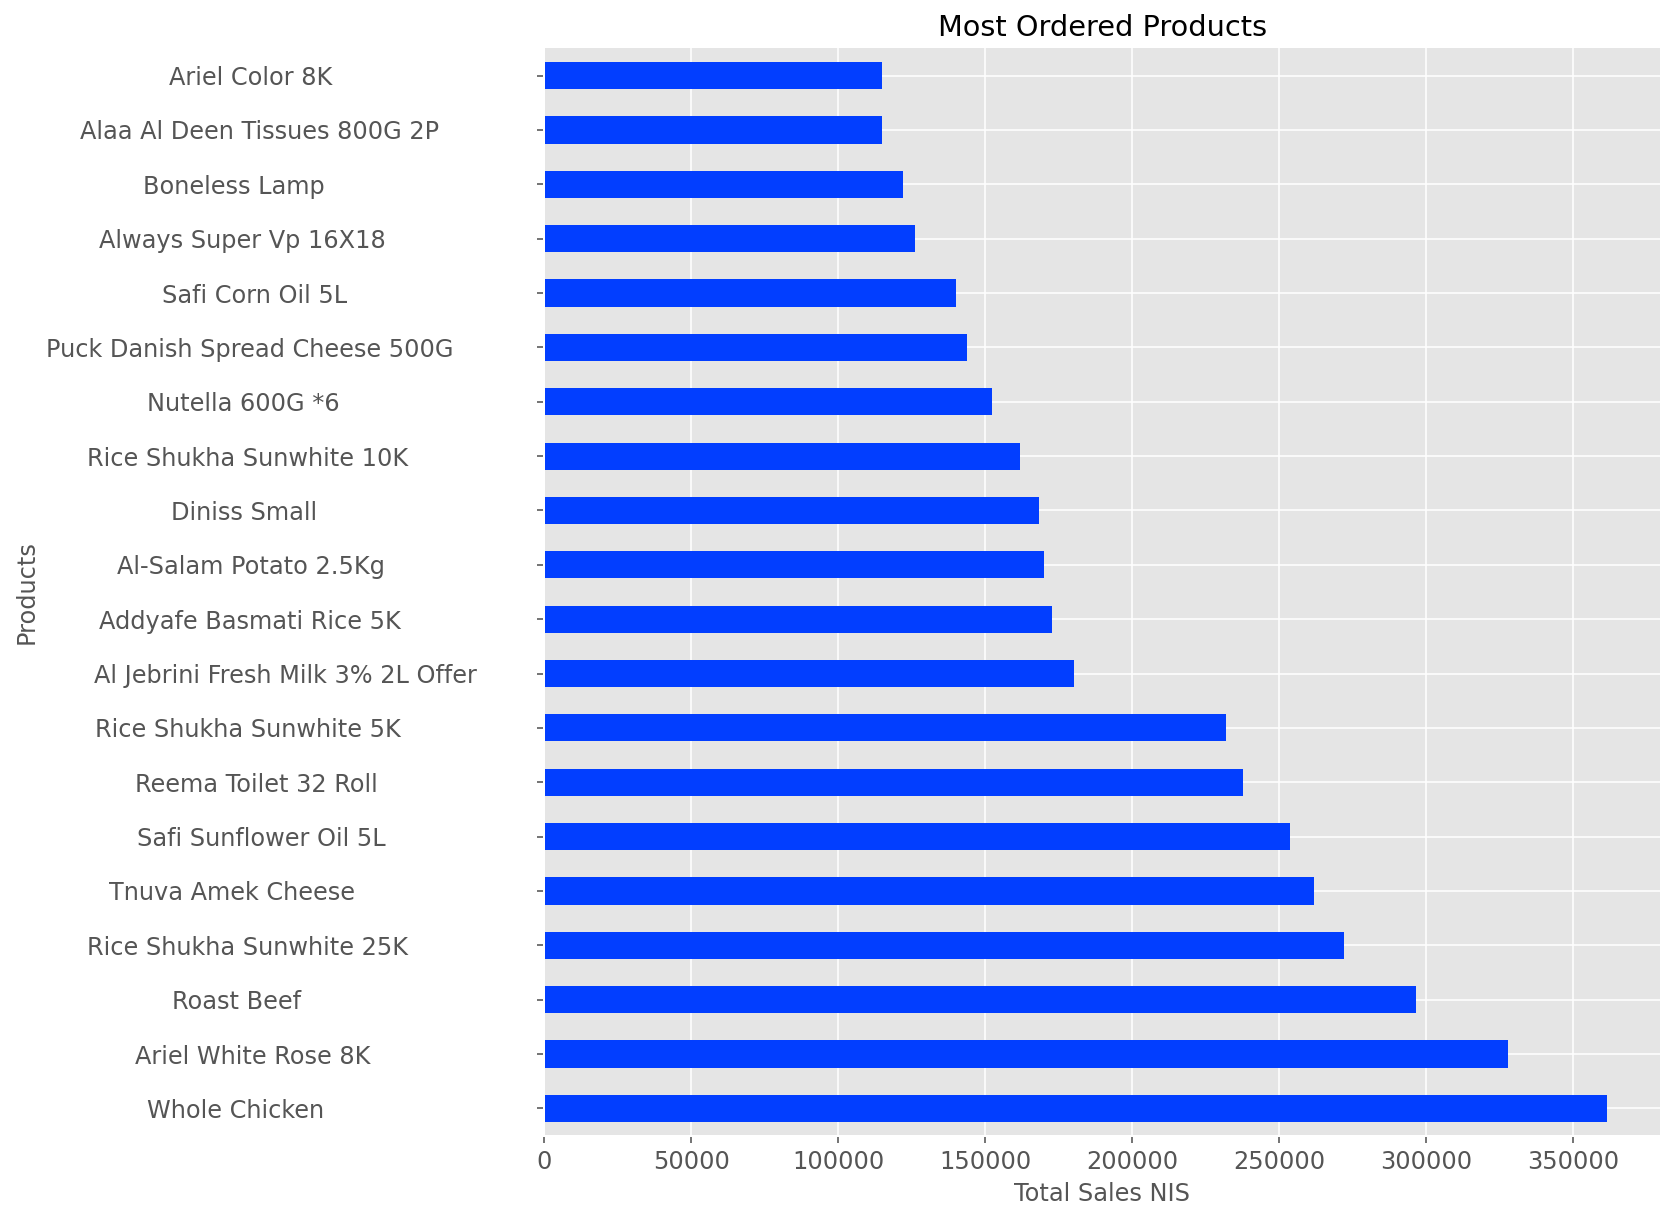

In [110]:
f, ax = plt.subplots(1,1, figsize=(10, 10));
df_items_trsactions= df_clean[['dTicketInternalKey', 'ItemName','NetSales_IncVAT']]
df =df_items_trsactions.groupby('ItemName')
df_sum=df['NetSales_IncVAT'].sum()

ax =df_sum.sort_values().nlargest(20).plot.barh()

ax.set_ylabel('Products');
ax.set_xlabel('Total Sales NIS');
ax.set_title('Most Ordered Products')
#ax.set_xlim(15000,50000)



### Q: What are the min/max of orders recived from customer?

Text(0.5, 1.0, 'Max/Min Recived from customer')

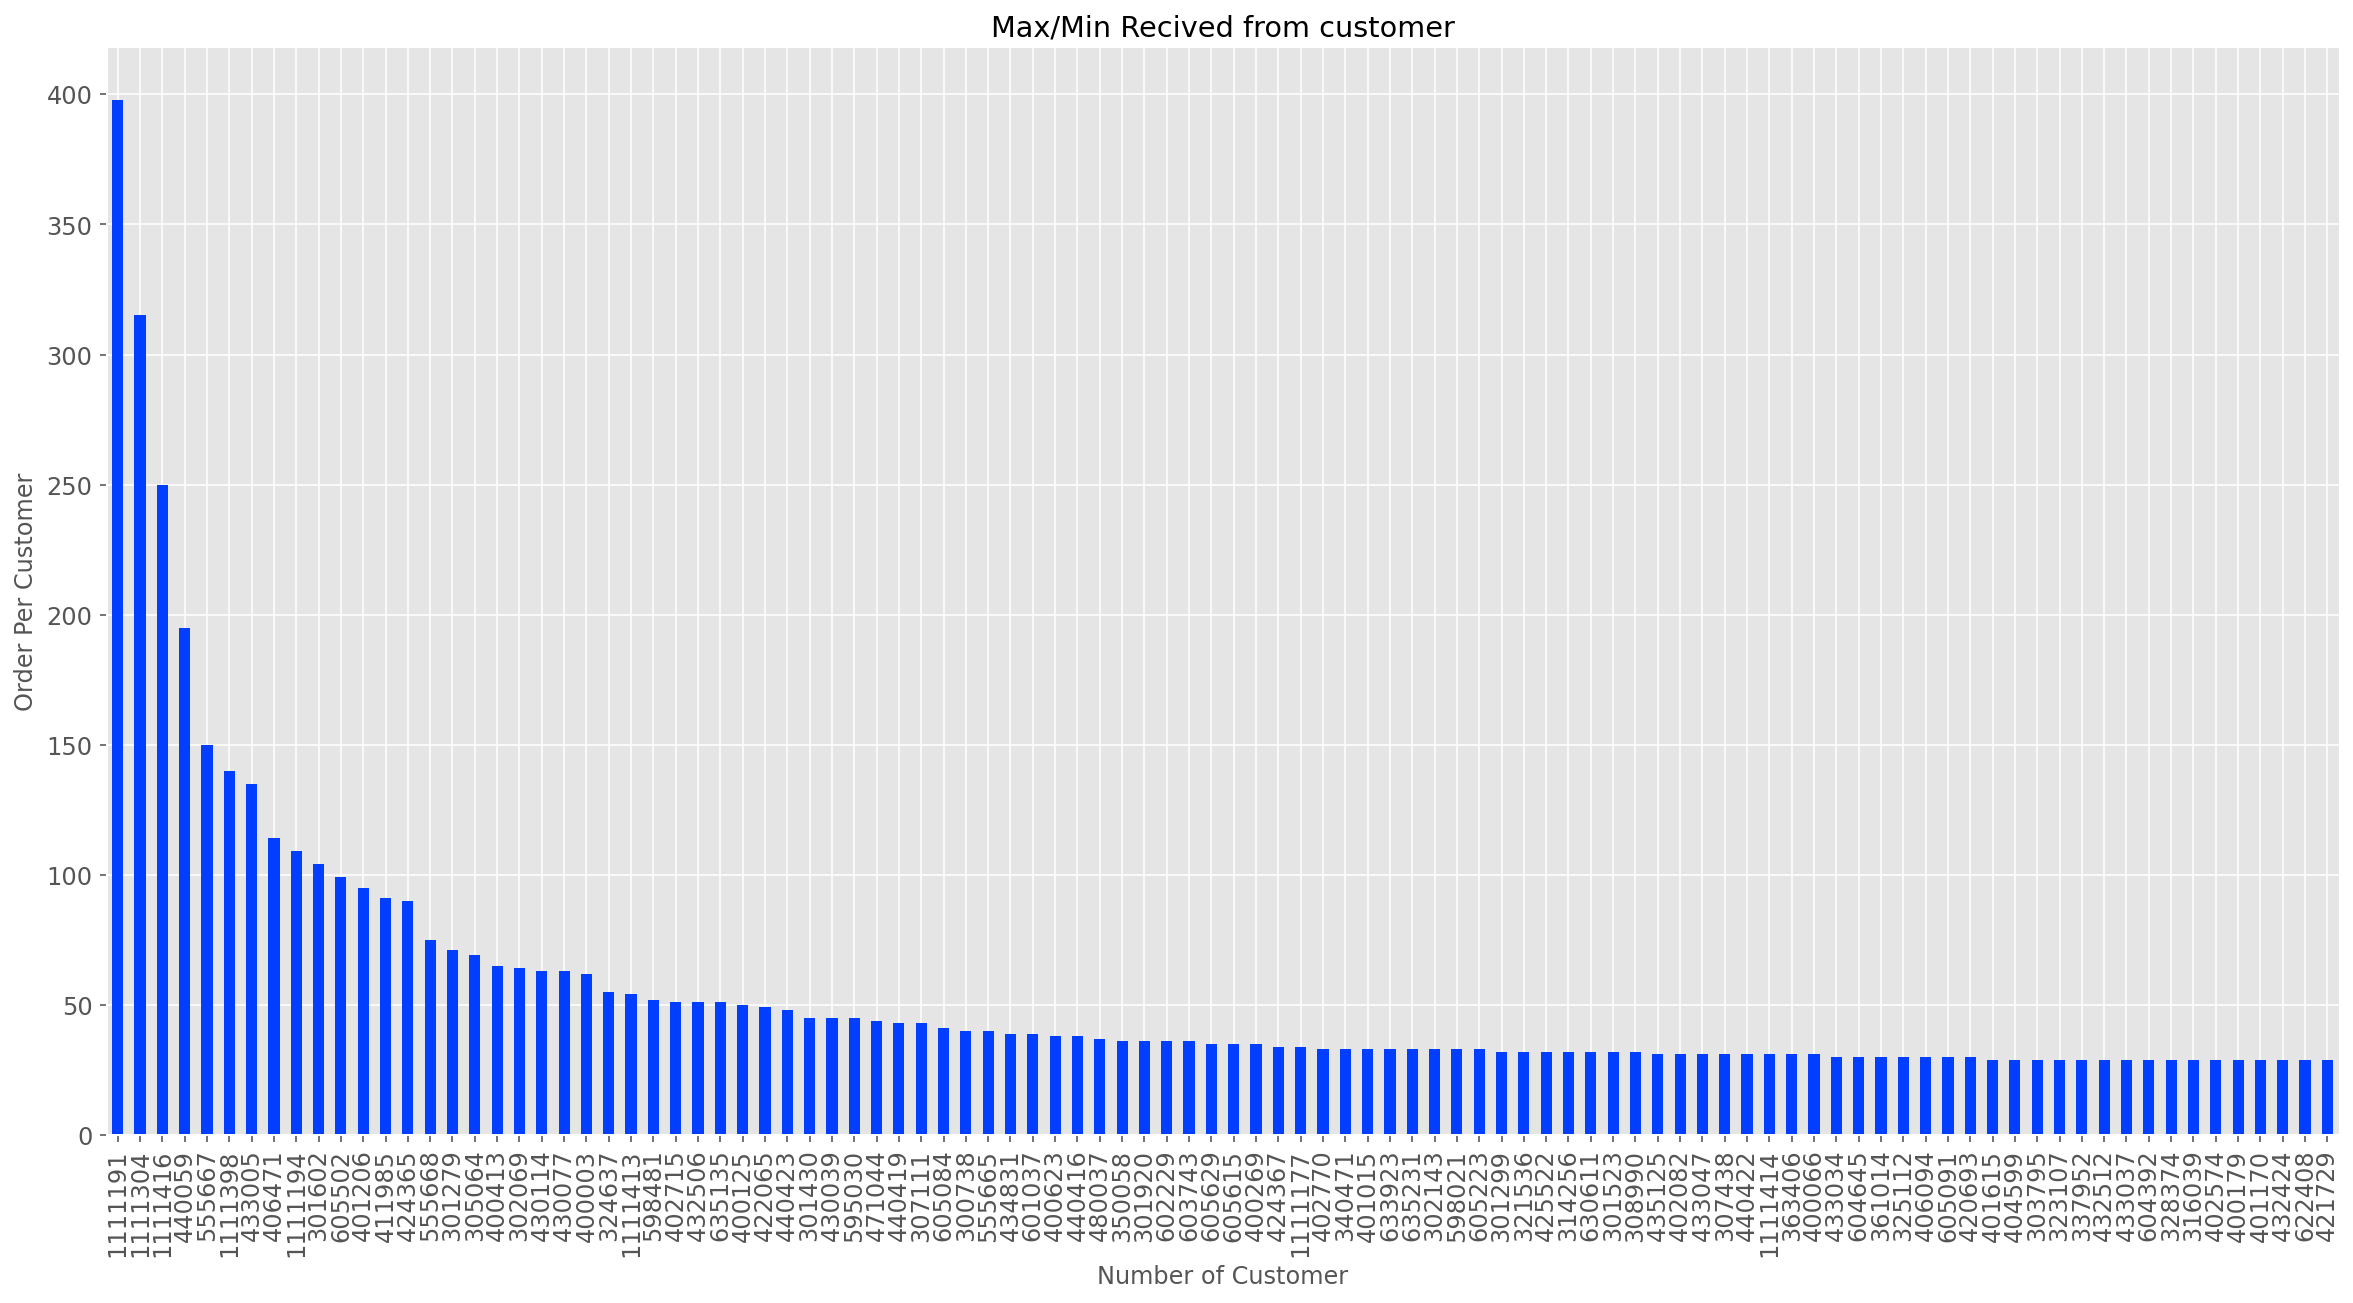

In [116]:
f, ax = plt.subplots(1,1, figsize=(20, 10));
customers_orders =uniqueTickets[uniqueTickets.CustomerGroup==1].CustomerNo
customers_orders_frequemcy = customers_orders.value_counts()
ax= customers_orders_frequemcy.nlargest(100).plot.bar()
ax.set_ylabel('Order Per Customer');
ax.set_xlabel('Number of Customer');
ax.set_title('Max/Min Recived from customer')
#ax.set_xlim(15000,50000)